# THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Giảng viên: Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# BÀI 6 - TÓM TẮT DỮ LIỆU VỚI CÁC THỐNG KÊ (Phần 2)

**Nội dung**

* [Phân tích đa biến](#da_bien)
* [Phân tích cặp biến định tính](#dinh_tinh)
* [Phân tích biến định tính với các biến định lượng](#dinh_tinh_dinh_luong)
* [Phân tích cặp biến định lượng](#dinh_luong)

**Tài liệu tham khảo**

* Chương 1 [Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruce & Peter Gedeck)](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/149207294X)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dữ liệu [`Iris Data Set`](https://archive.ics.uci.edu/ml/datasets/Iris).

In [2]:
iris_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv('iris.data', names=iris_names)
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <a name="da_bien"/>Phân tích đa biến

Khi dữ liệu gồm nhiều biến, cách phân tích dữ liệu đơn giản nhất là phân tích riêng lẻ từng biến được gọi là **phân tích đơn biến** (univariate analysis). 

Cách phân tích phức tạp và toàn diện hơn là phân tích đồng thời nhiều biến được gọi là **phân tích đa biến** (multivariate analysis). 

Trường hợp đặc biệt, phân tích đồng thời 2 biến được gọi là **phân tích cặp biến** (bivariate analysis).

Các kĩ thuật phân tích đa biến phụ thuộc chủ yếu vào kiểu của các biến là định tính hay định lượng.

## <a name="dinh_tinh"/>Phân tích cặp biến định tính

Với cặp biến định tính, **bảng đếm đồng thời** (contingency table, cross tabulation, crosstab) đếm số lượng (tần số) dữ liệu rơi vào các nhóm con, hay được dùng để mô tả quan hệ giữa 2 biến.

Trong bộ dữ liệu Iris thì biến `species` là biến định tính.

In [3]:
iris.species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

Biến `sepal_length` là biến định lượng nhưng có thể phân đoạn để thành biến định tính (có thứ tự).

In [4]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [5]:
sl_bins = pd.cut(iris.sepal_length, 5)
sl_bins.value_counts(sort=False)

sepal_length
(4.296, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

Tạo bảng đếm đồng thời dùng [`pandas.crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). Phức tạp hơn có thể dùng [`pandas.pivot_table`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) hoặc [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [6]:
pd.crosstab(iris.species, sl_bins, margins=True)

sepal_length,"(4.296, 5.02]","(5.02, 5.74]","(5.74, 6.46]","(6.46, 7.18]","(7.18, 7.9]",All
species,,,,,,
Iris-setosa,28,21,1,0,0,50
Iris-versicolor,3,18,20,9,0,50
Iris-virginica,1,2,21,15,11,50
All,32,41,42,24,11,150


Bảng trên cho thấy các giống hoa setosa, versiclor, virginica có sepal length lần lượt chiếm các phân vùng thấp, giữa và cao.

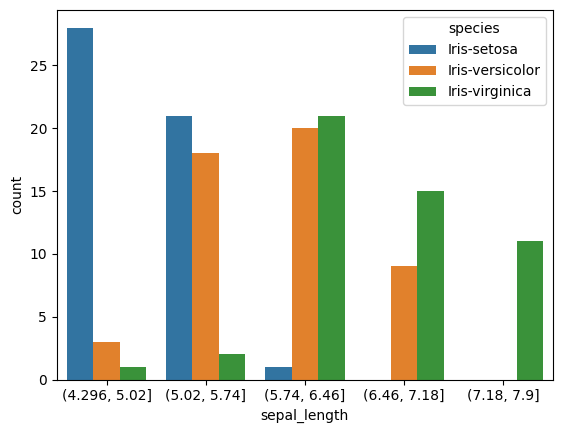

In [7]:
sns.countplot(x=sl_bins, hue=iris.species)
plt.show()

In [8]:
pd.crosstab(iris.species, pd.cut(iris.sepal_length, 3), margins=True)

sepal_length,"(4.296, 5.5]","(5.5, 6.7]","(6.7, 7.9]",All
species,,,,
Iris-setosa,47,3,0,50
Iris-versicolor,11,36,3,50
Iris-virginica,1,32,17,50
All,59,71,20,150


## <a name="dinh_tinh_dinh_luong"/>Phân tích biến định tính với các biến định lượng

Khi có biến định tính, ta có thể tách nhóm để phân tích riêng rẽ từng nhóm.

In [9]:
iris.groupby("species").describe().transpose()

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

Biểu đồ boxplot chia nhóm cũng hay được dùng.

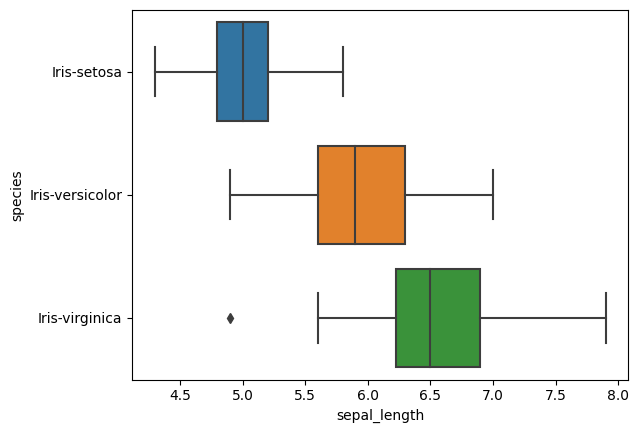

In [10]:
sns.boxplot(iris, x="sepal_length", y="species")
plt.show()

Hoặc dùng [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

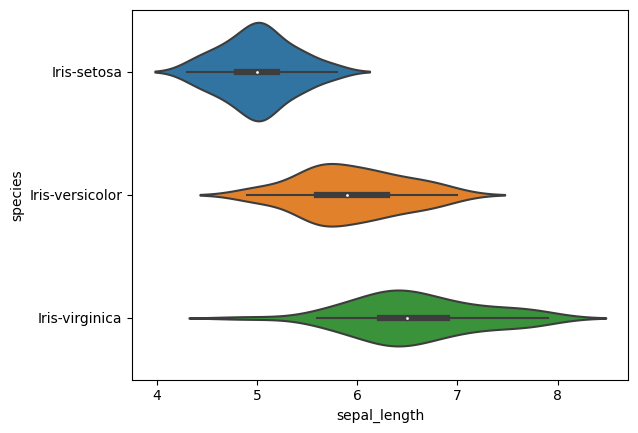

In [11]:
sns.violinplot(iris, x="sepal_length", y="species")
plt.show()

Biểu đồ mật độ chia nhóm cũng hay được dùng.

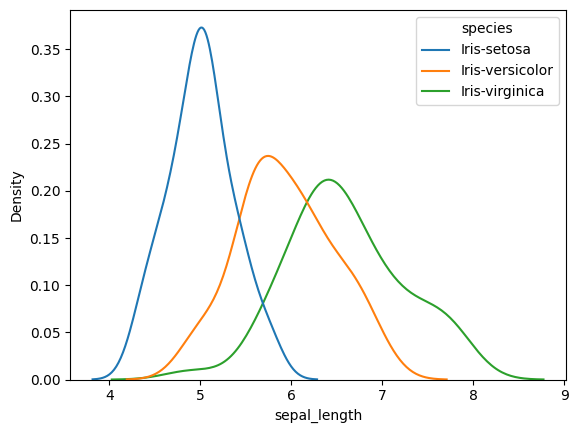

In [12]:
sns.kdeplot(iris, x="sepal_length", hue="species")
plt.show()

## <a name="dinh_luong"/>Phân tích cặp biến định lượng

**Hiệp phương sai** (covariance) mô tả "độ biến động cùng nhau" của 2 đại lượng.

In [13]:
spl = iris.sepal_length
spw = iris.sepal_width

m1 = spl.mean()
m2 = spw.mean()
sum_co_square_deviation = sum((x - m1)*(y - m2) for x, y in zip(spl, spw))
covar = sum_co_square_deviation / len(spl)

covar

-0.03900666666666666

In [14]:
print(spl.cov(spw))
print(spl.cov(spw, ddof=0))

-0.03926845637583891
-0.03900666666666665


In [15]:
np.cov(spl, spw)

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

Hiệp phương sai dương phản ánh 2 đại lượng "biến thiên cùng nhau", ngược lại, hiệp phương sai âm, cho thấy 2 đại lượng "biến thiên ngược nhau".

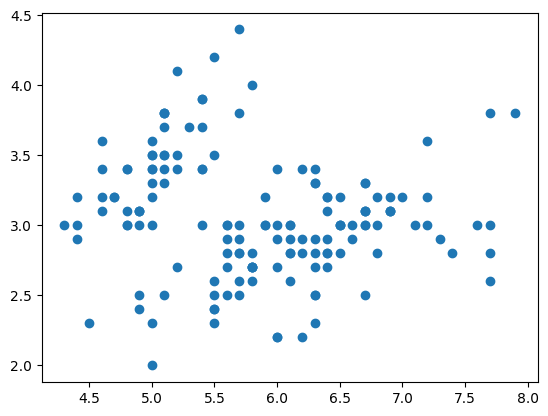

In [16]:
plt.scatter(spl, spw)
plt.show()

Hiệp phương sai cũng phụ thuộc vào sự biến thiên của từng đại lượng. Để đặc trưng tốt hơn cho riêng "độ biến thiên cùng nhau", người ta thường dùng **hệ số tương quan** (correlation coefficient) là hiệp phương sai đã chia cho độ lệch chuẩn của 2 đại lượng.

In [17]:
covar / (spl.std() * spw.std())

-0.108640121617645

In [18]:
spl.corr(spw)

-0.1093692499506493

In [19]:
np.corrcoef(spl, spw)

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

Ma trận hệ số tương quan (correlation matrix).

In [20]:
corr_matrix = iris.drop("species", axis=1).corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


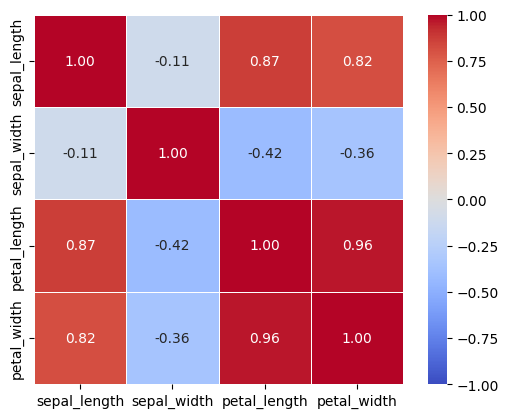

In [21]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, linewidths=0.5, annot=True, fmt=".2f", 
            cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.show()

**Bài tập**

1. Tính riêng hệ số tương quan giữa sepal_length với petal_length và vẽ biểu đồ phân tán để đối chiếu.

1. Tính riêng hệ số tương quan giữa sepal_width với petal_length và vẽ biểu đồ phân tán để đối chiếu.

In [22]:
# TODO:


Nếu dữ liệu gợi ý sự phân nhóm, ta nên phân tích theo từng nhóm!

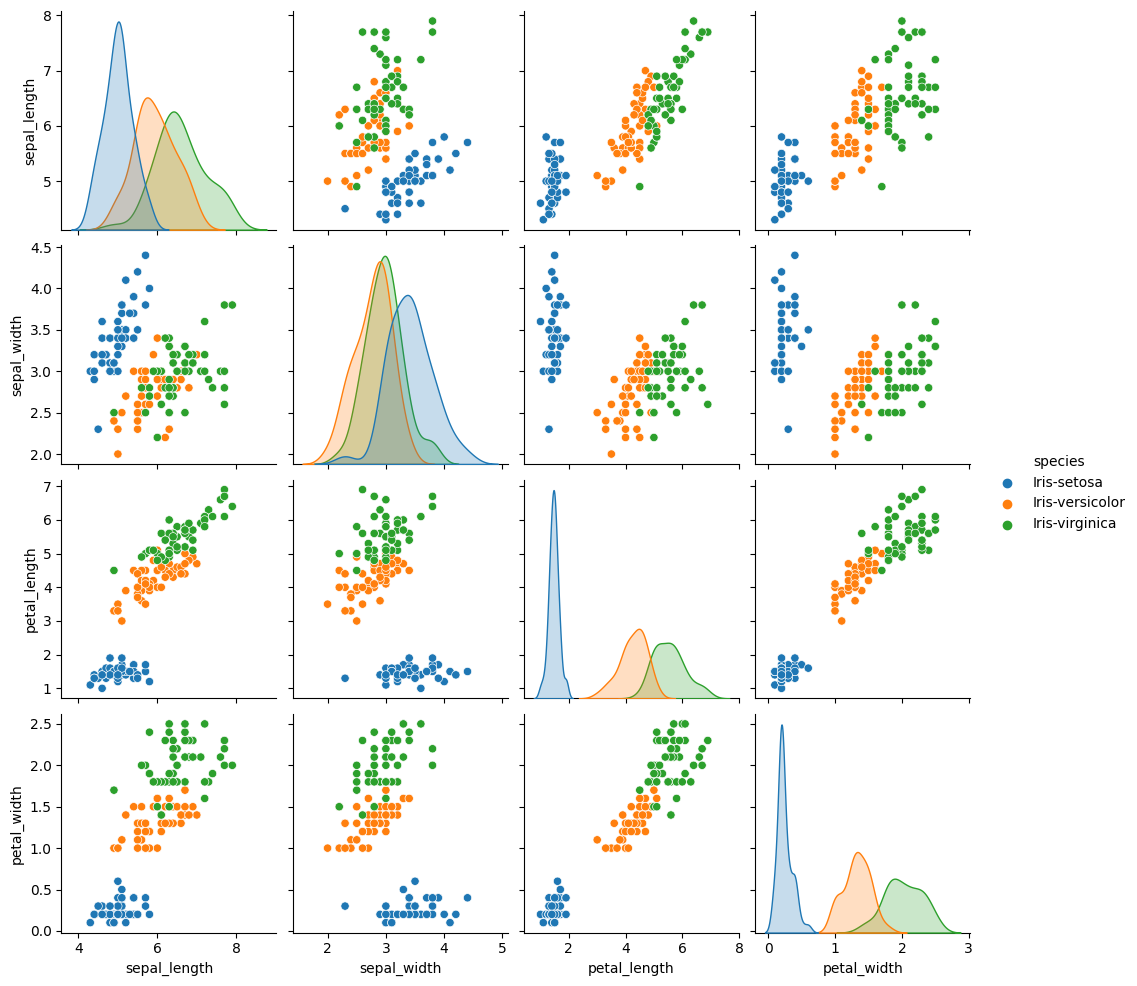

In [23]:
sns.pairplot(iris, hue="species")
plt.show()